In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("G:\CHADUVUKORA_YEDAVA\data\data01.csv")

In [3]:
df.head(1)

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...        138.75   

   Blood calcium    Chloride  Anion gap  Magnesium ion    PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.23    21.166667   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  

[1 rows x 51 columns]

In [4]:
df=df[["age","BMI","diabetes","Systolic blood pressure","Diastolic blood pressure","Respiratory rate","heart rate","SP O2"]]

In [5]:
df.head()

age        BMI  diabetes  Systolic blood pressure  \
0   72  37.588179         1               155.866667   
1   75        NaN         0               140.000000   
2   83  26.572634         0               135.333333   
3   43  83.264629         0               126.400000   
4   75  31.824842         0               156.560000   

   Diastolic blood pressure  Respiratory rate  heart rate      SP O2  
0                 68.333333         16.621622   68.837838  98.394737  
1                 65.000000         20.851852  101.370370  96.923077  
2                 61.375000         23.640000   72.318182  95.291667  
3                 73.200000         21.857143   94.500000  93.846154  
4                 58.120000         21.360000   67.920000  99.280000

In [6]:
df.isnull().sum()

age                           0
BMI                         215
diabetes                      0
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
heart rate                   13
SP O2                        13
dtype: int64

In [7]:
df["BMI"].fillna(df["BMI"].median(), inplace=True)

In [8]:
df["SP O2"].fillna(df["SP O2"].mean(), inplace=True)
df["heart rate"].fillna(df["heart rate"].median(), inplace=True)
df["Systolic blood pressure"].fillna(df["Systolic blood pressure"].median(), inplace=True)
df["Diastolic blood pressure"].fillna(df["Diastolic blood pressure"].median(), inplace=True)

In [9]:
df["Respiratory rate"].fillna(df["Respiratory rate"].median(), inplace=True)

In [10]:
x=df.drop("SP O2",axis=1)
y=df["SP O2"]

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [45]:
import tensorflow as tf

In [13]:
f1 = len(x.columns.tolist())
len1 = len(y.unique())

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
26/26 [==============================] - 1s 3ms/step - loss: 2074.4102 - mae: 34.9188
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 125.0526 - mae: 9.0121
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 76.2078 - mae: 6.8721
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 66.1338 - mae: 6.4462
Epoch 5/20
26/26 [==============================] - 0s 2ms/step - loss: 60.1274 - mae: 6.1789
Epoch 6/20
26/26 [==============================] - 0s 2ms/step - loss: 59.2050 - mae: 6.1028
Epoch 7/20
26/26 [==============================] - 0s 2ms/step - loss: 58.2813 - mae: 6.0543
Epoch 8/20
26/26 [==============================] - 0s 2ms/step - loss: 56.5707 - mae: 5.9457
Epoch 9/20
26/26 [==============================] - 0s 2ms/step - loss: 55.7899 - mae: 5.8753
Epoch 10/20
26/26 [==============================] - 0s 2ms/step - loss: 55.6561 - mae: 5.9109
Epoch 11/20
26/26 [==============================] - 0s

In [17]:
model.evaluate(xtest, ytest)

12/12 [==============================] - 0s 2ms/step - loss: 53.2677 - mae: 5.9310


[53.267730712890625, 5.930957794189453]

In [18]:
df.head()

age        BMI  diabetes  Systolic blood pressure  \
0   72  37.588179         1               155.866667   
1   75  28.312474         0               140.000000   
2   83  26.572634         0               135.333333   
3   43  83.264629         0               126.400000   
4   75  31.824842         0               156.560000   

   Diastolic blood pressure  Respiratory rate  heart rate      SP O2  
0                 68.333333         16.621622   68.837838  98.394737  
1                 65.000000         20.851852  101.370370  96.923077  
2                 61.375000         23.640000   72.318182  95.291667  
3                 73.200000         21.857143   94.500000  93.846154  
4                 58.120000         21.360000   67.920000  99.280000

In [19]:
df['Systolic blood pressure']=df['Systolic blood pressure']/100

In [20]:
df['Diastolic blood pressure']=df['Diastolic blood pressure']/10
df['Respiratory rate']=df['Respiratory rate']/10
df['heart rate']=df['heart rate']/10
df['SP O2']=df['SP O2']/100

In [21]:
x=df.drop("SP O2",axis=1)
y=df["SP O2"]

In [22]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.3)

In [23]:
model.fit(xtrain1, ytrain1, epochs=20)

Epoch 1/20
26/26 [==============================] - 0s 2ms/step - loss: 219.6565 - mae: 11.1422
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 8.9722 - mae: 2.4399
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4698 - mae: 0.5603
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 0.1838 - mae: 0.3327
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.1238 - mae: 0.2664
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.1040 - mae: 0.2398
Epoch 7/20
26/26 [==============================] - 0s 2ms/step - loss: 0.0893 - mae: 0.2206
Epoch 8/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0789 - mae: 0.2070
Epoch 9/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0707 - mae: 0.1947
Epoch 10/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0641 - mae: 0.1844
Epoch 11/20
26/26 [==============================] - 0s 3ms/step -

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

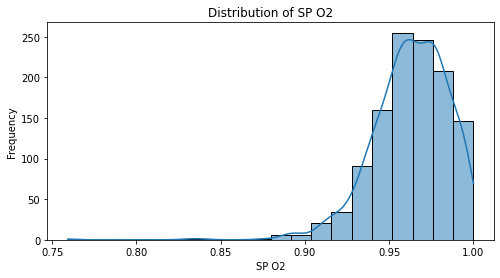

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(y, bins=20, kde=True)
plt.title('Distribution of SP O2')
plt.xlabel('SP O2')
plt.ylabel('Frequency')
plt.show()
##negatively skeweed which means mean is less than the median of the data and mode is less than mean
#from the peak majority of the persons have 96% as spo2 level
#left end of the tail are outliers

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


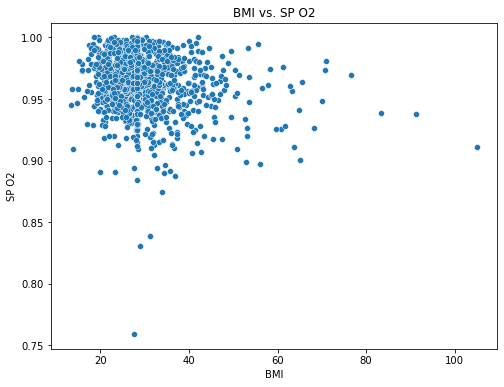

In [35]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot( x['BMI'],y)
    plt.title('BMI vs. SP O2')
    plt.xlabel('BMI')
    plt.ylabel('SP O2')
    plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


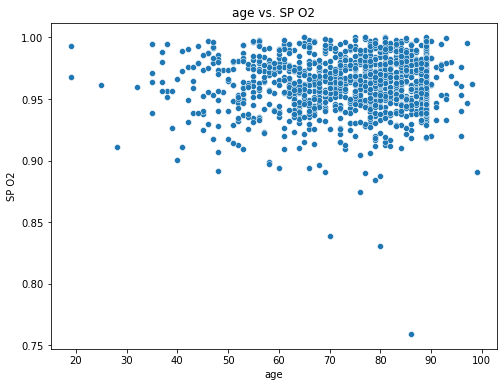

In [36]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x['age'],y)
    plt.title('age vs. SP O2')
    plt.xlabel('age')
    plt.ylabel('SP O2')
    plt.show()

In [46]:
import pickle
pickle.dump(model,open("spo2.pkl","wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-09-14 19:02:30         1800
metadata.json                                  2023-09-14 19:02:30           64
variables.h5                                   2023-09-14 19:02:30       134080
